<a href="https://colab.research.google.com/github/jyoti-2203/Python/blob/EDA/EDA_Banking_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('bank_marketing_updated_v1.csv')
df.head()

<ipython-input-2-fc4ad12bd6ef>:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bank_marketing_updated_v1.csv')


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


# Types of data in Banking dataset

1. Numeric type = salary, balance, duration and age

2. Categorical type = education , job , material , month etc.

3. ordinary type = age group

4. Time and date type.

5. Cordinate type

6. Numerical variable
Continous Number =  Height, weight, age, temperature(Int, float)

Discrete Number = integer number etc.


#Data cleaning


In [ ]:
df_clean = pd.read_csv('bank_marketing_updated_v1.csv', skiprows = 2)
df_clean.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Remove cusatomerid

In [ ]:
df_clean.drop("customerid", axis = 1 , inplace = True)
df_clean.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Dividing the jobedu column into Job and Education

In [ ]:
df_clean["Job"] = df_clean.jobedu.apply(lambda x: x.split(',')[0])
df_clean["Education"] = df_clean.jobedu.apply(lambda x: x.split(',')[1])

# deop the Jobedu column
df_clean.drop("jobedu", axis = 1, inplace = True)
df_clean.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
#Extract the value of month from the column month and remove year
df_clean.month = df_clean.month.apply(lambda x: x.split(",")[0])

In [ ]:
df_clean[df_clean.month.apply(lambda x: isinstance(x, float)) == True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [ ]:
#checking for missing values in the column
df_clean.isnull().sum()

,0
age,20
salary,0
balance,0
marital,0
targeted,0
default,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df_clean.age.isnull().sum()

np.int64(20)

In [ ]:
df_clean.shape

(45211, 19)

In [ ]:
null_age = float( 100.0 * 20 / 45211)
null_month = float(100.0 * 50/45211)
null_response = float(100.0 * 30/45211)

print(null_age)
print(null_month)
null_response

0.04423702196368141
0.11059255490920351


0.06635553294552211

In [ ]:
# drop rec with missing age values
df_clean_age = df_clean[~df_clean.age.isnull()].copy()
df_clean_age.shape

(45191, 19)

In [ ]:
df_clean_age.age.isnull().sum()

np.int64(0)

In [ ]:
#Handling missing value in month column
df_clean.month.isnull().sum()

np.int64(50)

In [ ]:
df_clean.month.value_counts(normalize= True)

,proportion
month,
"may, 2017",0.304400
"jul, 2017",0.152521
"aug, 2017",0.138172
"jun, 2017",0.118133
"nov, 2017",0.087863
"apr, 2017",0.064901
"feb, 2017",0.058590
"jan, 2017",0.031044
"oct, 2017",0.016342


In [ ]:
month_mode = df_clean.month.mode()[0]
month_mode

'may, 2017'

In [ ]:
df_clean.month.fillna(month_mode , inplace= True)
df_clean.month.value_counts(normalize= True)

<ipython-input-17-e4fe60c6a325>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean.month.fillna(month_mode , inplace= True)


,proportion
month,
"may, 2017",0.305169
"jul, 2017",0.152352
"aug, 2017",0.138020
"jun, 2017",0.118002
"nov, 2017",0.087766
"apr, 2017",0.064829
"feb, 2017",0.058526
"jan, 2017",0.031010
"oct, 2017",0.016323


In [ ]:
df_clean.month.isnull().sum()

np.int64(0)

In [ ]:
df_clean.isnull().sum()

,0
age,20
salary,0
balance,0
marital,0
targeted,0
default,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df_clean.pdays.describe()

,pdays
count,45211.000000
mean,40.197828
std,100.128746
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


In [ ]:
df_clean["pdays"]

,pdays
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
45206,-1
45207,-1
45208,184
45209,-1


-1 indicates missing value

I want to ignored missing value in the calculations.

simply make it missing or replace -1 with NaN

ALl summary statistics i.e. mean, median et. will ignored the missing value.

In [ ]:
df_clean.loc[df_clean.pdays == -1, "pdays"] = np.nan
df_clean.pdays.describe()

,pdays
count,8257.000000
mean,224.577692
std,115.344035
min,1.000000
25%,133.000000
50%,194.000000
75%,327.000000
max,871.000000


#Outlier handling

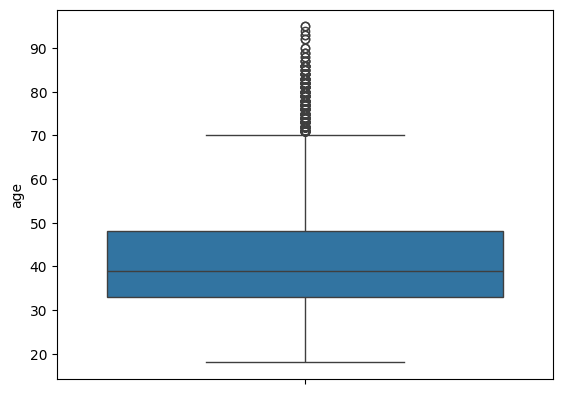

In [ ]:
sns.boxplot(df_clean.age)
plt.show()

In [ ]:
df_clean.balance.describe()

,balance
count,45211.000000
mean,1362.272058
std,3044.765829
min,-8019.000000
25%,72.000000
50%,448.000000
75%,1428.000000
max,102127.000000


In [ ]:
df_clean.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.935651,57006.171065,1362.272058,15.806419,2.763841,224.577692,0.580323
std,10.619198,32085.718415,3044.765829,8.322476,3.098021,115.344035,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,133.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,194.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,327.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [ ]:
df_clean[df_clean.balance >15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


Insted of looking at mean , we could look at qurtiles/median/ percentilies quantiles

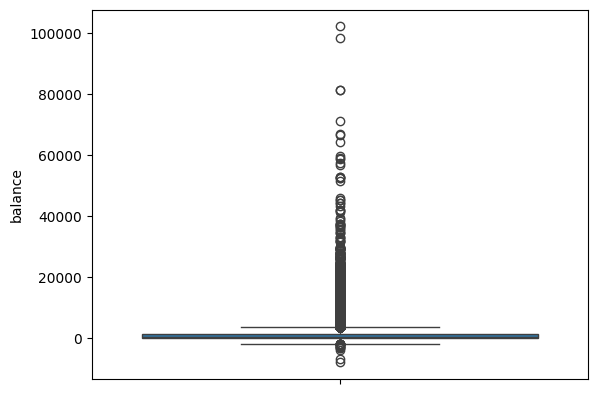

In [ ]:
sns.boxplot(df_clean.balance)
plt.show()

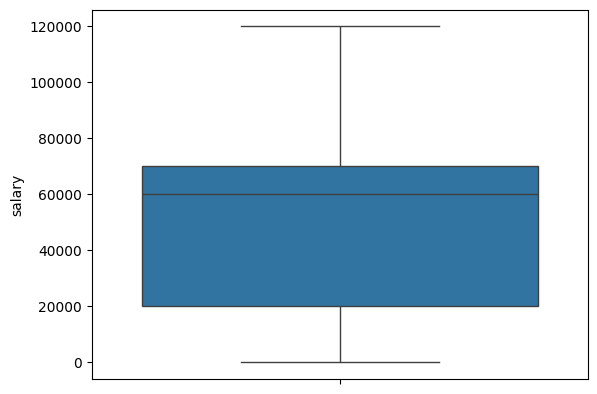

In [ ]:
sns.boxplot(df_clean.salary)
plt.show()

#Standarize Variable

In [ ]:
#Duration variable
df_clean.duration.head(10)

,duration
0,261 sec
1,151 sec
2,76 sec
3,92 sec
4,198 sec
5,139 sec
6,217 sec
7,380 sec
8,50 sec
9,55 sec


In [ ]:
df_clean.duration.describe()

,duration
count,45211
unique,2646
top,1.5 min
freq,138


In [ ]:
df_clean.duration[:5].apply(lambda x: float(x.split()[0])/60  if x.find("sec")>0 else float(x.split()[0]))

,duration
0,4.350000
1,2.516667
2,1.266667
3,1.533333
4,3.300000


#Univeriate Analysis - categorical data

In [ ]:
df_clean.dtypes

,0
age,float64
salary,int64
balance,int64
marital,object
targeted,object
default,object
housing,object
loan,object
contact,object
day,int64


In [ ]:
df_clean.marital.value_counts()

,count
marital,
married,27214
single,12790
divorced,5207


In [ ]:
df_clean.marital.value_counts(normalize= True)

,proportion
marital,
married,0.601933
single,0.282896
divorced,0.115171


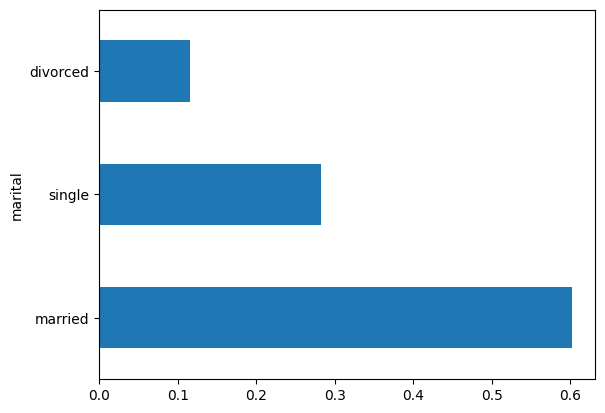

In [ ]:
df_clean.marital.value_counts(normalize= True).plot.barh()
plt.show()

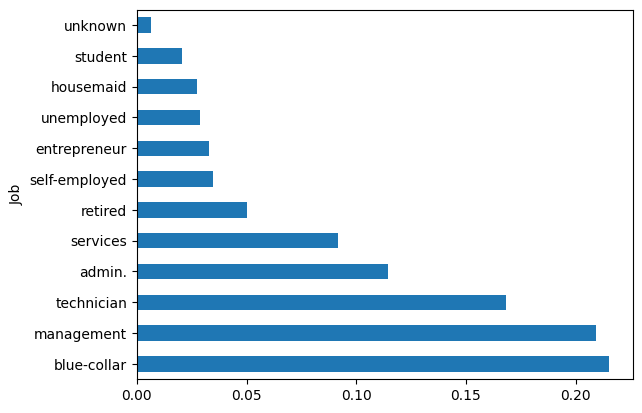

In [ ]:
df_clean.Job.value_counts(normalize= True).plot.barh()
plt.show()

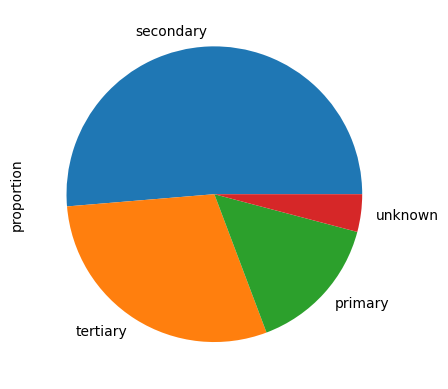

In [ ]:
df_clean.Education.value_counts(normalize= True).plot.pie()
plt.show()

<Axes: xlabel='poutcome'>

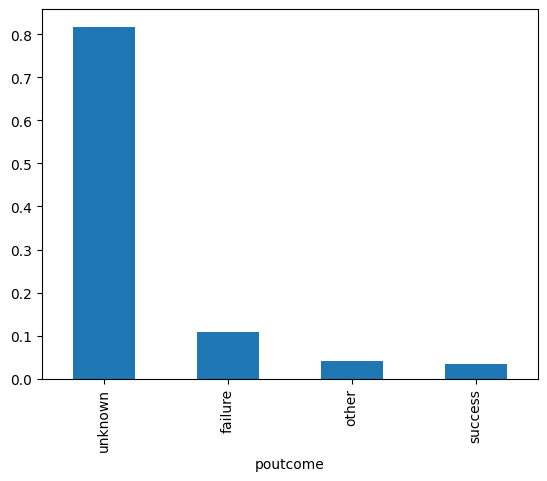

In [ ]:
df_clean.poutcome.value_counts(normalize= True).plot.bar()

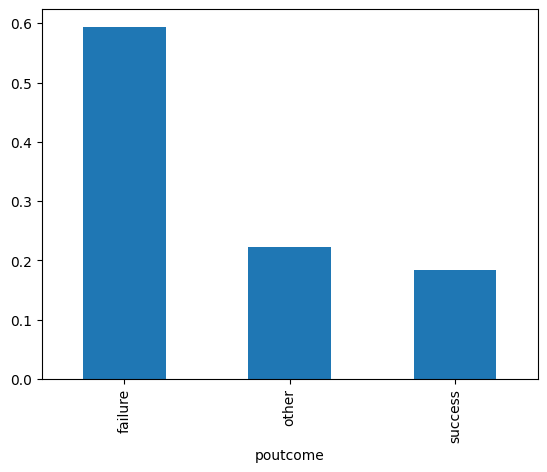

In [ ]:
df_clean[~(df_clean.poutcome == "unknown")].poutcome.value_counts(normalize= True).plot.bar()
plt.show()

In [ ]:
df_clean.response.value_counts(normalize= True)

,proportion
response,
no,0.882982
yes,0.117018


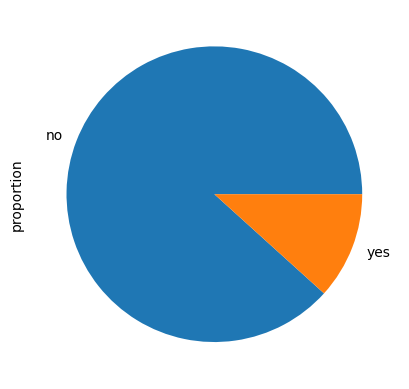

In [ ]:
df_clean.response.value_counts(normalize= True).plot.pie()
plt.show()